# EDA

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

In [2]:
%matplotlib inline

# Import dataset

In [3]:
df = pd.read_csv("Property.csv")

In [4]:
print("Shape:", df.shape)
print("\nColumn:", df.columns.tolist())

Shape: (168446, 18)

Column: ['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type', 'price', 'location', 'city', 'province_name', 'latitude', 'longitude', 'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Total_Area']


In [5]:
# print first 5 rows
print(df.head())

   Unnamed: 0  property_id  location_id  \
0           0       237062         3325   
1           1       346905         3236   
2           2       386513          764   
3           3       656161          340   
4           4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
2         G-15  Islamabad  Is

In [6]:
# DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [7]:
# Sum of missing values
print(df.isna().sum())

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64


# EDA Plot(Basic)

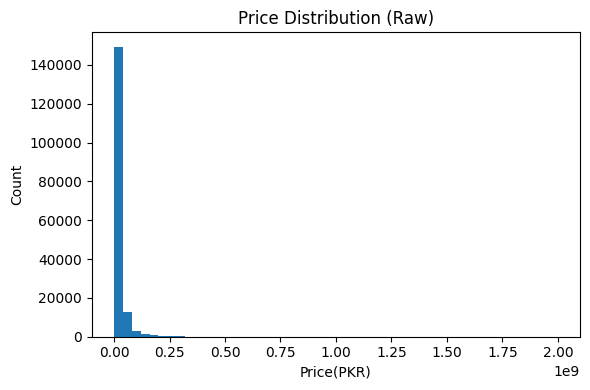

In [41]:
# Price Distribution(Raw)
plt.figure(figsize=(6,4))
plt.hist(df["price"].dropna(),bins=50)
plt.xlabel("Price(PKR)")
plt.ylabel("Count")
plt.title("Price Distribution (Raw)")
plt.tight_layout()
plt.show()

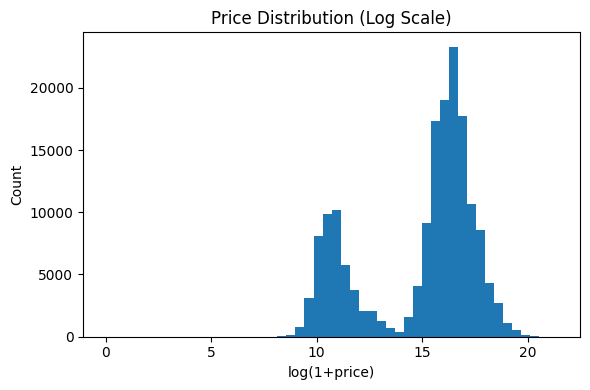

In [9]:
# Price distribution with log scale
df["log_price"] = np.log1p(df["price"])
plt.figure(figsize=(6,4))
plt.hist(df["log_price"].dropna(),bins=50)
plt.xlabel("log(1+price)")
plt.ylabel("Count")
plt.title("Price Distribution (Log Scale)")
plt.tight_layout()
plt.show()

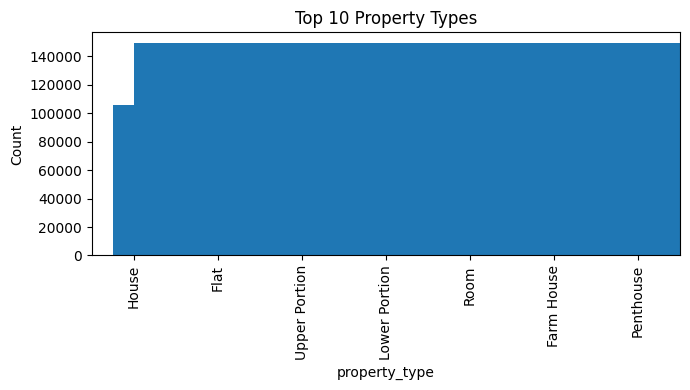

In [10]:
# Property type counts
plt.figure(figsize=(7,4))
df["property_type"].value_counts().head(10).plot(kind = "bar")
plt.hist(df["price"].dropna(),bins=50)
plt.ylabel("Count")
plt.title("Top 10 Property Types")
plt.tight_layout()
plt.show()

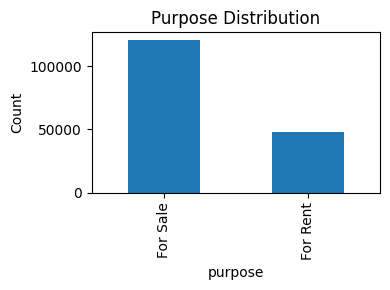

In [11]:
# Purpose counts (For Sale vs For Rent)
plt.figure(figsize=(4, 3))
df["purpose"].value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.title("Purpose Distribution")
plt.tight_layout()
plt.show()

# Supervised Learning I – Regression (Predict Price)

 Prepare Data for Regression

In [12]:
# select relavent column
col_reg = ["price","bedrooms","baths","Total_Area","city","property_type"]

In [13]:
df_reg = df[col_reg].copy()

In [14]:
#Drop rows with missing values
df_reg = df_reg.dropna()

In [15]:
# Remove rows where Total_Area is zero or negative
df_reg = df_reg[df_reg["Total_Area"] > 0]

In [16]:
# feature - price per unit area
df_reg["price_per_area"] = df_reg["price"] / df_reg["Total_Area"]

In [17]:
print("Shape of df_reg:",df_reg.shape)
print("Head:\n",df_reg.head())

Shape of df_reg: (168434, 7)
Head:
       price  bedrooms  baths  Total_Area       city property_type  \
0  10000000         2      2    1089.004  Islamabad          Flat   
1   6900000         3      3   15246.056  Islamabad          Flat   
2  16500000         5      6    2178.008  Islamabad         House   
3  43500000         4      4   10890.000  Islamabad         House   
4   7000000         3      3    2178.008  Islamabad         House   

   price_per_area  
0     9182.702727  
1      452.576063  
2     7575.729749  
3     3994.490358  
4     3213.945954  


# Encode Categorical Features

In [18]:
# Convert city and property_type to dummy variables (one-hot encoding)
df_reg_encoded = pd.get_dummies(df_reg,
                                columns=["city", "property_type"],
                                drop_first=True)

# Define X (features) and y (target)
X_reg = df_reg_encoded.drop(columns=["price"])
y_reg = df_reg_encoded["price"]

# Train–Test Split and Model Training

In [20]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#  Evaluate Regression Model

In [21]:
y_pred_reg = reg_model.predict(X_test_reg)

In [23]:
r2 = r2_score(y_test_reg, y_pred_reg)
print("R² score:", r2)

R² score: 0.26160160043637204


# Plotting

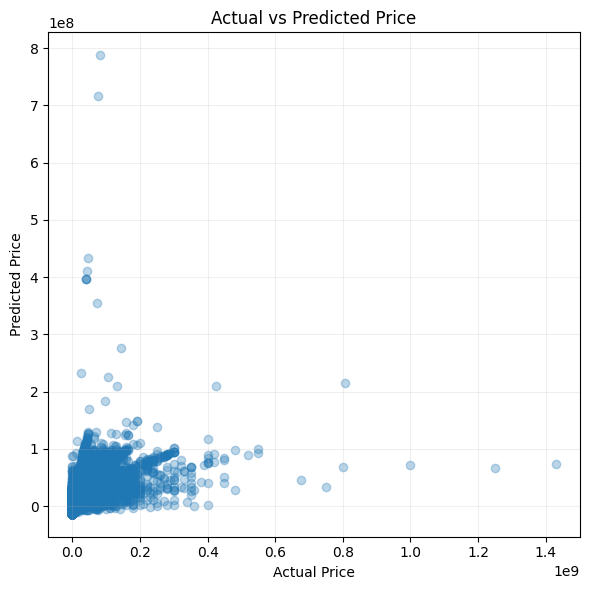

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Supervised Learning II – Classification (Sale vs Rent)

 Prepare Data for Classification

In [25]:
cols_clf = ["purpose", "bedrooms", "baths", "Total_Area", "price"]

In [27]:
df_clf = df[cols_clf].copy()

In [29]:
# drop missing values
df_clf = df_clf.dropna()

In [31]:
# Encode purpose (For Sale / For Rent) as 0/1
le = LabelEncoder()
df_clf["purpose_label"] = le.fit_transform(df_clf["purpose"])

In [33]:
print(df_clf["purpose"].value_counts())
print(df_clf.head())

purpose
For Sale    120655
For Rent     47791
Name: count, dtype: int64
    purpose  bedrooms  baths  Total_Area     price  purpose_label
0  For Sale         2      2    1089.004  10000000              1
1  For Sale         3      3   15246.056   6900000              1
2  For Sale         5      6    2178.008  16500000              1
3  For Sale         4      4   10890.000  43500000              1
4  For Sale         3      3    2178.008   7000000              1


# Train Classification Model

In [34]:
feature_cols = ["bedrooms", "baths", "Total_Area", "price"]
X_clf = df_clf[feature_cols]
y_clf = df_clf["purpose_label"]

In [35]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

In [36]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluate Classification Model

In [37]:
y_pred_clf = clf_model.predict(X_test_clf)

acc = accuracy_score(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)

print("Accuracy:", acc)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9992282576432175
Confusion Matrix:
[[ 9518     3]
 [   23 24146]]
